# Machine Learning 

### Classification Models

In [1]:
#Importing the packages
import pandas as pd 
import numpy as np 

#Importing visualization tools
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading in our dataset
crash = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv")
crash.sample(5)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
109034,2021,Q3,Dark Lights On,3.0,Prince George's,16.0,NaN,0.0,Non Intersection,1.0,...,Feet,F,E,4666.0,CO,NaN,BLACK OAK DR,39.066661,-76.865273,POINT (-76.865273072298 39.066661250872)
531486,2017,Q3,Daylight,1.0,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,...,NaN,F,S,NaN,NaN,NaN,3300 ELBERT ST,39.287021,-76.672388,POINT (-76.6723877191544 39.2870214009178)
577411,2015,Q3,Dark Lights On,3.0,Baltimore,3.0,NaN,0.0,Non Intersection,1.0,...,NaN,F,N,139.0,MD,NaN,CHARLES ST,39.419230,-76.638039,POINT (-76.63803866666672 39.4192298333333)
510006,2017,Q2,Dark Lights On,3.0,Baltimore City,24.0,NaN,999.0,Intersection,2.0,...,NaN,F,E,1440.0,MU,NaN,S BROADWAY,39.289228,-76.593515,POINT (-76.5935146808624 39.2892281392232)
60367,2020,Q3,Daylight,1.0,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,...,Feet,F,N,NaN,NaN,NaN,WHITBY RD,39.334851,-76.533333,POINT (-76.533333084108 39.334850564694)


In [3]:
# Checking for information
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   878343 non-null  int64  
 1   QUARTER                878343 non-null  object 
 2   LIGHT_DESC             841025 non-null  object 
 3   LIGHT_CODE             878343 non-null  float64
 4   COUNTY_DESC            878329 non-null  object 
 5   COUNTY_NO              878329 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              659957 non-null  float64
 8   JUNCTION_DESC          760119 non-null  object 
 9   JUNCTION_CODE          791512 non-null  float64
 10  COLLISION_TYPE_DESC    878343 non-null  object 
 11  COLLISION_TYPE_CODE    878343 non-null  int64  
 12  SURF_COND_DESC         789107 non-null  object 
 13  SURF_COND_CODE         791512 non-null  float64
 14  LANE_CODE              668083 non-nu

In [4]:
# Using specific columns from the original dataframe but making a new dataframe 
columns = ['COUNTY_DESC', 'YEAR', 'QUARTER', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 
'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'REPORT_TYPE', 
'FEET_MILES_FLAG_DESC', 'FIX_OBJ_DESC', 'ACC_DATE', 'ACC_TIME', 'SIGNAL_FLAG_DESC', 'C_M_ZONE_FLAG', 
'DISTANCE_DIR_FLAG', 'JUNCTION_DESC', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'DISTANCE', 'REFERENCE_ROAD_NAME']

# Copying the columns into new dataframe 
df_crash = crash[columns].copy()

In [5]:
# Joining fatal and injury together as severe crash since they are similar 
df_crash['REPORT_TYPE'] = df_crash['REPORT_TYPE'].replace({'Fatal Crash': 'Severe Crash', 'Injury Crash': 'Severe Crash'})

In [6]:
# Dropping rows with nan in REPORT_TYPE 
df_crash = df_crash.dropna(subset=['REPORT_TYPE'])

In [7]:
# Checking the counts for all columns 
df_crash.REPORT_TYPE.value_counts()

Property Damage Crash    550429
Severe Crash             217181
Name: REPORT_TYPE, dtype: int64

In [8]:
# Displaying the new dataframe 
df_crash.sample(3)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
759222,Harford,2018,Q1,Same Direction Rear End,No Defects,"Two-way, Not Divided",Daylight,Dry,Clear,NaN,...,20180109,15:44:00,Yes,N,N,Non Intersection,1.980,North,10.0,VIETNAM VETERANS MEMORIAL HWY
178821,Prince George's,2021,Q4,Other,No Defects,Not Applicable,Daylight,Dry,NaN,Not Applicable,...,20211224,10:57:00,No,N,E,Not Applicable,0.160,East,1.0,MARYLAND PARK DR
844078,Baltimore,2017,Q4,Unknown,No Defects,"Two-way, Not Divided",Daylight,Dry,Clear,NaN,...,20171016,12:00:00,No,N,N,Non Intersection,0.217,South,500.0,FLEMING DR


In [9]:
# Checking for nulls 
df_crash.isnull().sum()

COUNTY_DESC                  14
YEAR                          0
QUARTER                       0
COLLISION_TYPE_DESC           0
RD_COND_DESC              74158
RD_DIV_DESC               78127
LIGHT_DESC                29945
SURF_COND_DESC            76110
WEATHER_DESC             345004
HARM_EVENT_DESC1         484726
HARM_EVENT_DESC2              0
REPORT_TYPE                   0
FEET_MILES_FLAG_DESC     468214
FIX_OBJ_DESC              41599
ACC_DATE                      0
ACC_TIME                      0
SIGNAL_FLAG_DESC              0
C_M_ZONE_FLAG                 0
DISTANCE_DIR_FLAG         74158
JUNCTION_DESC            100660
LOG_MILE                  74159
LOGMILE_DIR_FLAG_DESC    149460
DISTANCE                  86823
REFERENCE_ROAD_NAME       74932
dtype: int64

In [10]:
# Changing all the columns from new dataframe where they are null as 'unknown' because it wasnt reported in accident 
df_crash.fillna('Unknown', inplace=True)
df_crash.sample(5)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
39263,Cecil,2020,Q4,Same Direction Rear End,No Defects,"Two-way, Not Divided",Daylight,Wet,Raining,Other Vehicle,...,20201029,13:25:00,Yes,N,N,Intersection Related,1.7,North,0.0,NORTH ST
527926,Baltimore,2018,Q4,Unknown,No Defects,Not Applicable,Daylight,Not Applicable,Not Applicable,Unknown,...,20181024,09:27:00,No,N,E,Not Applicable,3.22,East,1.0,JOHNNYCAKE RD
408524,Anne Arundel,2019,Q2,Head On Left Turn,No Defects,"Two-way, Not Divided",Daylight,Dry,Cloudy,Unknown,...,20190621,14:59:00,No,N,N,Non Intersection,1.24,North,0.0,COLONY RD
451503,Anne Arundel,2018,Q2,Same Direction Right Turn,No Defects,"Two-way, Divided, Positive Median Barrier",Dark No Lights,Wet,Raining,Unknown,...,20180519,21:30:00,No,N,N,Not Applicable,13.84,North,0.5,NO NAME
332440,Prince George's,2017,Q1,Single Vehicle,No Defects,"Two-way, Not Divided",Daylight,Wet,Cloudy,Unknown,...,20170120,13:07:00,No,N,S,Not Applicable,0.0,South,200.0,MARSHALL AVE


In [11]:
# Checking for nulls again for each columns 
df_crash.isnull().sum()

COUNTY_DESC              0
YEAR                     0
QUARTER                  0
COLLISION_TYPE_DESC      0
RD_COND_DESC             0
RD_DIV_DESC              0
LIGHT_DESC               0
SURF_COND_DESC           0
WEATHER_DESC             0
HARM_EVENT_DESC1         0
HARM_EVENT_DESC2         0
REPORT_TYPE              0
FEET_MILES_FLAG_DESC     0
FIX_OBJ_DESC             0
ACC_DATE                 0
ACC_TIME                 0
SIGNAL_FLAG_DESC         0
C_M_ZONE_FLAG            0
DISTANCE_DIR_FLAG        0
JUNCTION_DESC            0
LOG_MILE                 0
LOGMILE_DIR_FLAG_DESC    0
DISTANCE                 0
REFERENCE_ROAD_NAME      0
dtype: int64

# Technique and Models 

## Logistic Regression

### Crash severity classification:

In [12]:
# Importing the necessary library
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [13]:
# Selecting the features and target variable that is applicable 
features = ['COUNTY_DESC', 'YEAR', 'QUARTER', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 
'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2',
'FEET_MILES_FLAG_DESC', 'FIX_OBJ_DESC', 'ACC_DATE', 'ACC_TIME', 'SIGNAL_FLAG_DESC', 'C_M_ZONE_FLAG', 
'DISTANCE_DIR_FLAG', 'JUNCTION_DESC', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'DISTANCE']
target = 'REPORT_TYPE'

In [14]:
# Filtering through our dataset to include those classes 
filtered = df_crash[df_crash[target].isin(['Property Damage Crash', 'Severe Crash'])]

In [15]:
# Preparing crash data by encoding variables
encoder = LabelEncoder()
for feature in features: 
    filtered[feature] = encoder.fit_transform(filtered[feature].astype(str))

In [16]:
# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(filtered[features], filtered[target], test_size = 0.2, random_state=42)

In [17]:
# Create and train model 
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [18]:
# performing the prediction on the test 
predictions = logistic_regression.predict(X_test)

In [19]:
# Performances of the model
print("Classification Model: Logistic Regression")

print(classification_report(y_test, predictions))

Classification Model: Logistic Regression
                       precision    recall  f1-score   support

Property Damage Crash       0.72      1.00      0.83    110045
         Severe Crash       0.50      0.00      0.01     43477

             accuracy                           0.72    153522
            macro avg       0.61      0.50      0.42    153522
         weighted avg       0.66      0.72      0.60    153522



Based on our performance of the Linear Regression, the accuray of 72% is considered a good score. 

## ROC Curve 

In [20]:
# Importing 
from sklearn.preprocessing import LabelEncoder

# Preparing the crash data by encoding
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)

# probabilities for positive class 
prob = logistic_regression.predict_proba(X_test)[:, 1]

# Computing false positive rate, true positive rate, and threshold 
fpr, tpr, thresholds = roc_curve(y_test_encoded, prob)


In [21]:
# Calculating ROC curve 
roc_auc = auc(fpr, tpr)
roc_auc

0.5985683623627394

ROC Curve: Logistic Regression


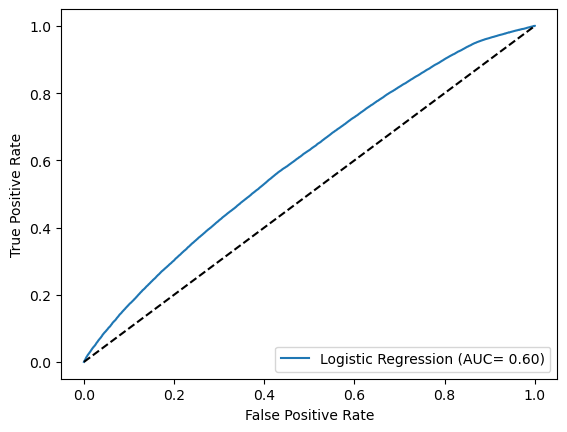

In [22]:
# Plotting the ROC curve 
print("ROC Curve: Logistic Regression")
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (AUC= %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

From our analysis, the AUC value tells us that it is considered a poor to fair performance. 60% would be lower so for this I would choose Logistic Regression Classification to decide our crash severity classification. 

# Random Forest Classification

### Crash severity classification:

In [23]:
# Importing Random Forest Classification 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, plot_confusion_matrix 


In [24]:
# Selecting all the features and target variables 
features_rf = ['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 
              'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 
              'DISTANCE_DIR_FLAG']
target_rf = 'REPORT_TYPE'

In [25]:
# Filtering to include all of the features and target variable 
filtered_rf = df_crash[features_rf + [target_rf]]

In [26]:
# Converting all the categorical variables into numerical 
data_encoded = pd.get_dummies(filtered_rf, columns=['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 
                'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 
                'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'DISTANCE_DIR_FLAG'])

In [27]:
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop(target_rf, axis=1), 
                                                    data_encoded[target_rf],test_size=0.2, random_state=42)

In [28]:
# Create and train the Random Forest Classifier 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Perform prediction for the X_test 
pred = random_forest.predict(X_test)

In [30]:
print("Classification Model: Random Forest")

print(classification_report(y_test, pred))

Classification Model: Random Forest
                       precision    recall  f1-score   support

Property Damage Crash       0.76      0.89      0.82    110045
         Severe Crash       0.50      0.27      0.35     43477

             accuracy                           0.72    153522
            macro avg       0.63      0.58      0.58    153522
         weighted avg       0.68      0.72      0.69    153522



From our analysis, the random forest classifier is 72% accuracy. 

# ROC Curve for Random Forest

In [31]:
# Converting categorical target labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [32]:
# create train for random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train_encoded)

RandomForestClassifier()

In [33]:
# Obtain predicted probabilities for positive class 
y_scores = random_forest.predict_proba(X_test)[:, 1]

In [34]:
# computing FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)

In [35]:
# Computing area under ROC curve
auc_score = auc(fpr, tpr)
auc_score

0.6742231264494938

ROC Curve: Random Forest


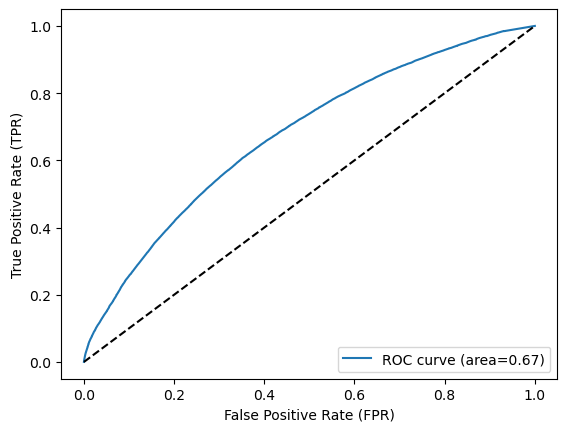

In [37]:
# Plot ROC curve
print("ROC Curve: Random Forest")
plt.plot(fpr, tpr, label='ROC curve (area={:.2f})'.format(auc_score))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()

The ROC Curve for random forest shows a 67%. 

## Confusion Matrix 

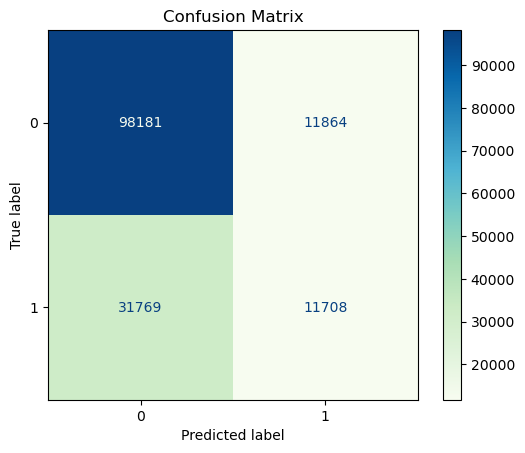

In [38]:
# Creating the confusion matrix for the results and different colors
plot_confusion_matrix(random_forest, X_test, y_test_encoded, cmap=plt.cm.GnBu) # Changing colors of confusion matrix
plt.title("Confusion Matrix") # Title 
plt.show()

### Based on the results from confusion matrix: 

- 98103 represent number of instances correctly predicted as 'Property Damage Crash' (True Negatives). 
- 11942 represent the number of instances incorrectly predicted as 'Severe Crash' when they should be 'Property Damage Crash' (False Positives). 
- 31805 represent the number of instances incorrectly predicted as 'Property Damage Crash' when they should be 'Severe Cash' (False Negatives). 
- 11672 represent the number of instances correctly predicted as 'Severe Crash' (True Positives). 

### In Summary: 
- The confusion matrix correctly predicted 'Property Damage Crash' with count of 98103 (True Negatives). 
- The model made false positive predictions because it classified 'Severe Crash' when they were 'Property Damage Crash' with count of 11942 (False Positives).
- The model false negative prediction because it classified 'Property Damage Crash' when they were 'Severe Crash' incorrectly with count of 31805 (False Negatives). 
- the confusion matrix correctly predicted 'Severe Crash' with count of 11672 (True Positives). 

# Decision Tree

In [39]:
# Importing models
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [40]:
# Identifying feature and target variables 
features_dt = ['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 
              'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 
              'DISTANCE_DIR_FLAG']
target_dt = 'REPORT_TYPE'

In [41]:
# Filtering to include all of the features and target variable 
filtered_dt = df_crash[features_dt + [target_dt]]

In [42]:
# Converting all the categorical variables into numerical 
data_encoded_dt = pd.get_dummies(filtered_dt, columns=['COUNTY_DESC', 'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'JUNCTION_DESC', 'COLLISION_TYPE_DESC', 
              'RD_COND_DESC', 'RD_DIV_DESC', 'FIX_OBJ_DESC', 'SIGNAL_FLAG_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 
              'DISTANCE_DIR_FLAG'])

In [43]:
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(data_encoded_dt.drop(target_dt, axis=1), 
                                                    data_encoded_dt[target_rf],test_size=0.2, random_state=42)

In [44]:
# Creating a decision tree classifier
decision_tree = DecisionTreeClassifier()

In [45]:
# train decision tree classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# Making predictions on test value
predictions = decision_tree.predict(X_test)

In [47]:
# Printing the model performance
print("Classification Model: Decision Tree")
print(classification_report(y_test, predictions))

Classification Model: Decision Tree
                       precision    recall  f1-score   support

Property Damage Crash       0.75      0.83      0.79    110045
         Severe Crash       0.42      0.32      0.36     43477

             accuracy                           0.68    153522
            macro avg       0.59      0.57      0.57    153522
         weighted avg       0.66      0.68      0.67    153522



From on the results, the decision tree results show that the accuracy is 68%. 

In [48]:
# Converting categorical into numerical 
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [49]:
# Create decision tree
decision_tree = DecisionTreeClassifier()

In [50]:
# Create train model 
decision_tree.fit(X_train, y_train_encoded)

DecisionTreeClassifier()

In [51]:
# Get predicted probabilities for severe crash 
y_scores = decision_tree.predict_proba(X_test)[:,1]

In [52]:
# Compute false position rate, true positive, and thresholds 
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_scores)

In [53]:
# Computing area of ROC curve 
roc_auc = auc(fpr, tpr)
roc_auc

0.594424626609869

ROC Curve: Decision Tree


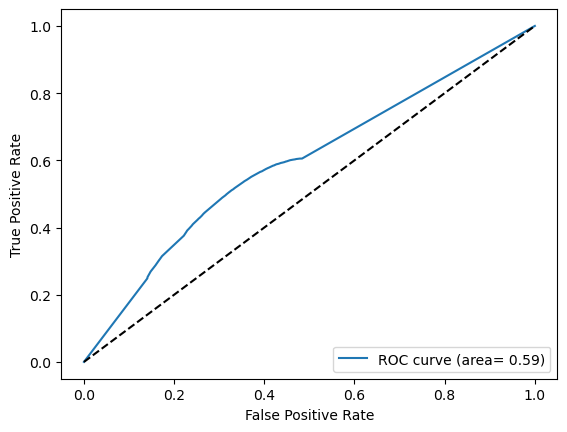

In [54]:
# plot ROC curve 
print("ROC Curve: Decision Tree")
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The ROC curve from our decision tree shows that it is 59%. The results of the ROC curve is low. 

## Overall analysis: 

Based on the overall results, random forest model and ROC curve value of .67 suggest that it provides a better discrimination compared to logistic regression and decision tree. Although, logistic regression and random forest classification have the same accuracy of .72 (72%), comparing the ROC curve of .67 (67%) a higher ROC curve indicates a better distinction between positive and negative classes. The model provides a higher probability of correctly  classifying 'Severe Crash' as positive instances. 

Random Forest classification model is the better model to proceed with as it has higher ROC curve value indicating better overall performance in the target variable. 

## References: 
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://www.trollingerlaw.com/car-accident-statistics/#:~:text=The%20most%20current%20car%20crash,county%20roads%20(23%20percent).
- https://realpython.com/logistic-regression-python/
- https://www.sharpsightlabs.com/blog/pandas-get-dummies/
- https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://www.geeksforgeeks.org/calculate-roc-auc-for-classification-algorithm-such-as-random-forest/
